In [76]:
import os
import sys

par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)

In [77]:
import numpy as np

labels = np.load("label.npy")
predictions = np.load("prediction.npy")

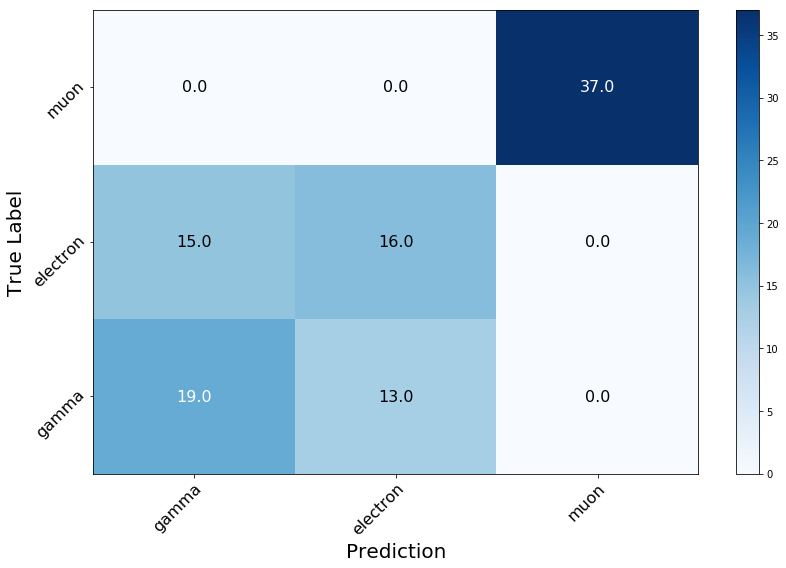

In [78]:
from utils.plot_utils import plot_confusion_matrix

plot_confusion_matrix(labels,predictions,['gamma','electron','muon'])

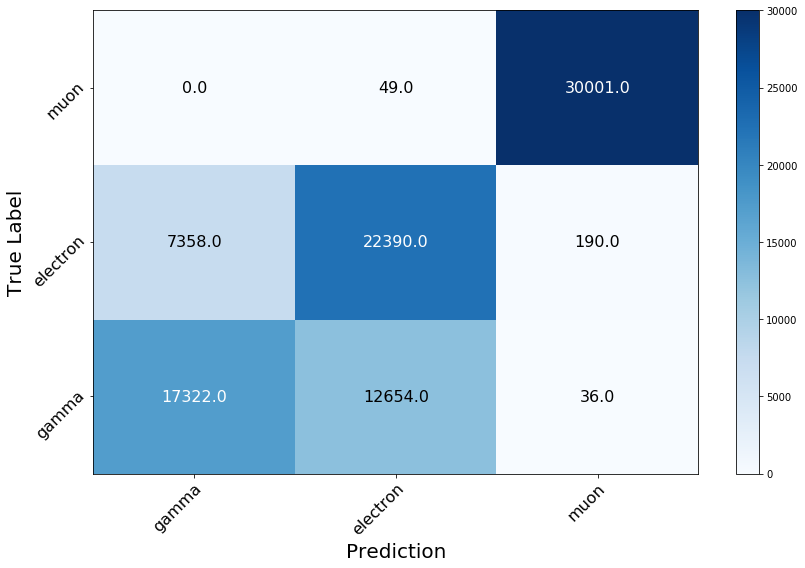

In [79]:
labels2 = np.load("label2.npy")
predictions2 = np.load("prediction2.npy")

plot_confusion_matrix(labels2,predictions2,["gamma","electron","muon"], save_path="fig.eps")

# Plotting a ROC curve for the multi-class classification problem

In [80]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [81]:
# Binarize the labels using one vs all approach
predictions2 = label_binarize(predictions2, classes=[0,1,2])
labels2 = label_binarize(labels2, classes=[0,1,2])
n_classes = 3
class_dict = {0:"gamma", 1:"electron", 2:"muon"}

In [82]:
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold, roc_auc = dict(), dict(), dict(), dict()

for i in range(n_classes):
    fpr[i], tpr[i], threshold[i] = roc_curve(labels2[:,i], predictions2[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [83]:
import matplotlib.pyplot as plt

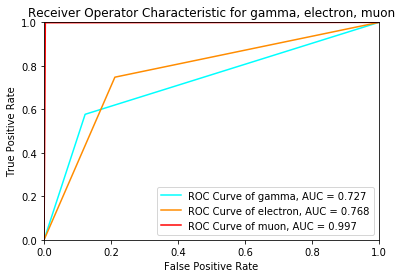

In [84]:
# Plot all the ROC curves
plt.figure()

plt.title("Receiver Operator Characteristic for gamma, electron, muon")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

colors = iter(['aqua', 'darkorange', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label="ROC Curve of {0}, AUC = {1:0.3f}".format(class_dict[i],
                                                                                          roc_auc[i]))
    
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

plt.show()

In [58]:
print(threshold)

{0: array([2, 1, 0], dtype=int64), 1: array([2, 1, 0], dtype=int64), 2: array([2, 1, 0], dtype=int64)}


In [60]:
from sklearn.metrics import roc_auc_score

print("Gamma : ", roc_auc_score(labels2[:,0], predictions2[:,0]))

print("Electron : ", roc_auc_score(labels2[:,1], predictions2[:,1]))

print("Muon : ", roc_auc_score(labels2[:,2], predictions2[:,2]))

Gamma :  0.2489577650302818
Electron :  0.7681904156094395
Muon :  0.29416180150125104


In [62]:
print(labels2[:100,0], predictions2[:100,0])
print(labels2[:100,1], predictions2[:100,1])
print(labels2[:100,2], predictions2[:100,2])

[0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1] [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0
 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0]
[1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0] [1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0]
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0
 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1

In [72]:
acc = []
for i in range(3):
    acc_i = np.sum(labels2[:,i] == predictions2[:,i])
    acc.append(acc_i)
    print(acc_i/labels2.shape[0])
    
print(acc)

0.33147777777777776
0.7749888888888888
0.3918888888888889
[29833, 69749, 35270]


In [65]:
print(np.sum(acc))

134852


In [69]:
print(labels2[:10,0] == predictions2[:10,0])
print(np.sum(labels2[:10,0] == predictions2[:10,0]))
print(labels2[:10,0], predictions2[:10,0])

[ True  True False False  True  True False False False False]
4
[0 0 0 1 0 0 1 1 1 1] [0 0 1 0 0 0 0 0 0 0]


In [70]:
print(labels2.shape)
print(predictions2.shape)

(90000, 3)
(90000, 3)


# Post-processing analysis for resnet18

Epoch : 0.69

Iteration : 1000

Batch size : 500

Entire dataset

In [85]:
labels3 = np.load("label3.npy")
predictions3 = np.load("prediction3.npy")

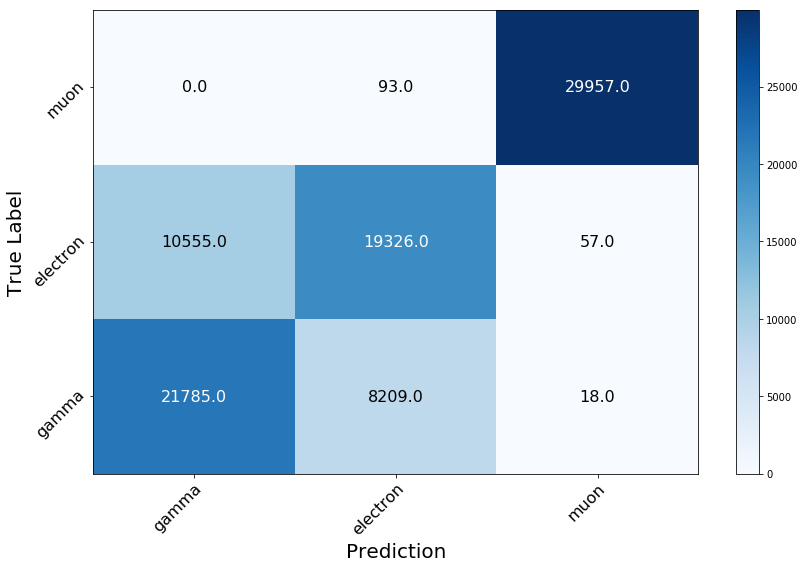

In [86]:
plot_confusion_matrix(labels3,predictions3,["gamma","electron","muon"], save_path="fig1.eps")

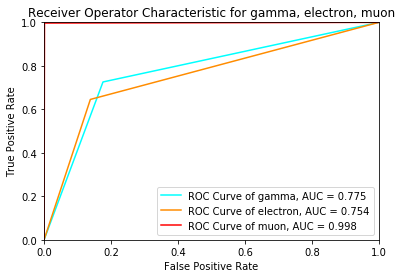

In [87]:
# Binarize the labels using one vs all approach
predictions3 = label_binarize(predictions3, classes=[0,1,2])
labels3 = label_binarize(labels3, classes=[0,1,2])
n_classes = 3
class_dict = {0:"gamma", 1:"electron", 2:"muon"}

# Compute ROC curve and ROC area for each class
fpr, tpr, threshold, roc_auc = dict(), dict(), dict(), dict()

for i in range(n_classes):
    fpr[i], tpr[i], threshold[i] = roc_curve(labels3[:,i], predictions3[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot all the ROC curves
plt.figure()

plt.title("Receiver Operator Characteristic for gamma, electron, muon")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

colors = iter(['aqua', 'darkorange', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label="ROC Curve of {0}, AUC = {1:0.3f}".format(class_dict[i],
                                                                                          roc_auc[i]))
    
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

plt.show()